## july

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
%%time
july = pd.read_pickle('../data/july_geo.pkl')

Wall time: 1min 46s


In [3]:
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376)
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770)
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872)
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713)
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820)


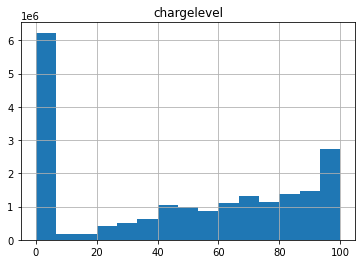

In [6]:
july.hist(column = 'chargelevel', bins = 15)
plt.show()

In [7]:
zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
zone.head(5)

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


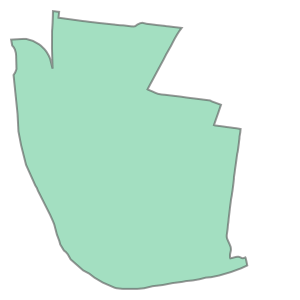

In [8]:
zone.loc[0, 'geometry']

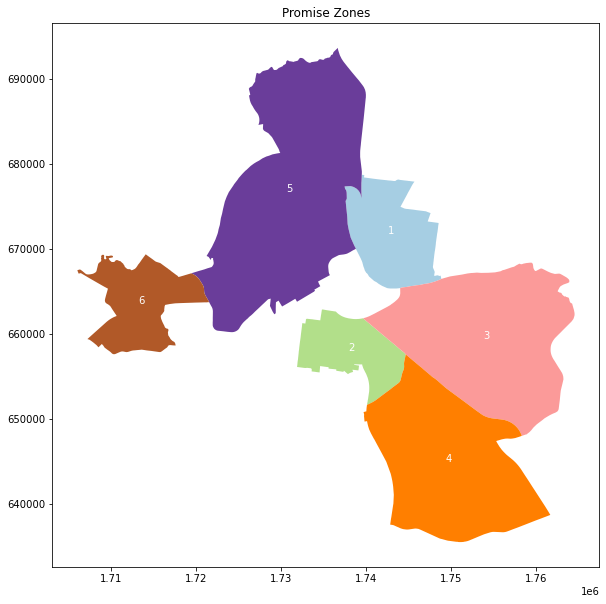

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
zone.plot(ax = ax, column = 'ZONE_ID', cmap = 'Paired')

for index, row in zone.iterrows():
    plt.annotate(text=row['ZONE_ID'],
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', color = 'white')
plt.title('Promise Zones');

In [13]:
count = july.value_counts('sumdid').unique()
count

array([8915, 8910, 8909, ...,    3,    2,    1], dtype=int64)

In [12]:
july['date'] = july['pubdatetime'].dt.date
july['day'] = july['pubdatetime'].dt.day
july['hour'] = july['pubdatetime'].dt.hour


In [14]:
july.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376),2019-07-22,22,23
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770),2019-07-11,11,12
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872),2019-07-11,11,12
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713),2019-07-11,11,12
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820),2019-07-11,11,12


In [23]:
# focus only on scooters with 100 charged
full_charge = july.loc[july['chargelevel'] == 100]
full_charge

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376),2019-07-22,22,23
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770),2019-07-11,11,12
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872),2019-07-11,11,12
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713),2019-07-11,11,12
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820),2019-07-11,11,12
...,...,...,...,...,...,...,...,...,...,...,...
17092735,2019-07-21 15:52:10.980,36.158228,-86.783888,Powered402686,100.0,0.15,Lyft,POINT (-86.78389 36.15823),2019-07-21,21,15
17092729,2019-07-21 15:51:53.617,36.169344,-86.802608,Powered414680,100.0,0.15,Lyft,POINT (-86.80261 36.16934),2019-07-21,21,15
21156727,2019-07-27 00:56:57.007,36.127225,-86.786293,Powered520856,100.0,0.15,Lyft,POINT (-86.78629 36.12723),2019-07-27,27,0
13961824,2019-07-17 15:08:13.070,36.166384,-86.779288,Powered329834,100.0,0.15,Lyft,POINT (-86.77929 36.16638),2019-07-17,17,15


In [17]:
nash = [36.174465, -86.767960]